In [1]:
import numpy as np
import json
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import clear_output
from albumentations.augmentations.transforms import Blur, RandomCrop, HueSaturationValue, ToGray

In [2]:
DATASET_PATH = '/home/ivan/Documents/6_projects/dist_cnn/dataset/augmented/raw'
SAVE_PATH = '/home/ivan/Documents/6_projects/dist_cnn/dataset/augmented/processed'
RANDOM_CROP_SIZE = 64
BASE_CROP_SIZE = 96

In [3]:
def show_image(image, size=(4,4)):
    fig, ax = plt.subplots(figsize=size)
    ax.grid(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.imshow(image)
    plt.imshow(image)

In [4]:
with open(os.path.join(DATASET_PATH, 'labels.json')) as lbs:
    data = json.load(lbs)['data']
print(len(data))
data = [x for x in data if x['mult'] == 1]
print(len(data))

85710
50745


(64, 64, 3)


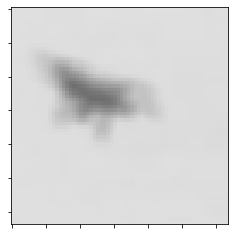

In [31]:
blur = Blur(p=0.9, blur_limit=7)
hsv = HueSaturationValue(p=0.9)
crop = RandomCrop(p=1, height=RANDOM_CROP_SIZE, width=RANDOM_CROP_SIZE)
gray = ToGray(p=1)
im = cv2.imread(DATASET_PATH + '/' + data[300]['name'])
im = blur.apply(im, **blur.get_params())
im = hsv.apply(im, **hsv.get_params())
im = crop.apply(im, **crop.get_params())
im = gray.apply(im, **gray.get_params())
print(im.shape)
show_image(im)

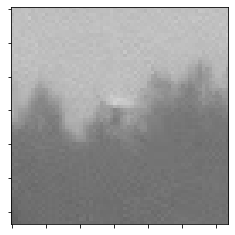

In [63]:
im2 = cv2.imread('/home/ivan/Documents/6_projects/dist_cnn/dataset/real_data/frame_16895.jpg')
show_image(im2)